In [42]:
__author__ = 'adnan'
'''this program compares the performance of AMWR with other state-of-the-art 
prediction methods in terms of Mean Absolute Percentage Error'''

import numpy as np
import csv
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVR
from scipy.stats import norm, expon  , ks_2samp, kstest, t
from pandas import *
from sklearn.neighbors import KernelDensity
#from sklearn.utils import check_arrays
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor
from skmultiflow.meta import AdaptiveRandomForestRegressor
    
#define window sizes
TrainingWindow = 20


#creating DataFrame object
df = pd.DataFrame()


#reading csv file into DataFrame object
dfa = pd.read_csv('03-2014.csv', parse_dates=['fecha'], index_col='fecha', sep = ';')

dfa = dfa[dfa['identif'] == 'PM10344']

#feature. intensidad or vmed
df_intensidad_1 = dfa[['intensidad']]

#code for extracting data for particular time
hour = df_intensidad_1.index.hour
selector_new = (( 1 <= hour) & (hour <= 23))
df_total_1 = df_intensidad_1[selector_new]



#interpolation using cubic method for missing values
df_total_1 = df_total_1.resample('5min')
df_total_1 = df_total_1.interpolate(method ='cubic')

hours = df_total_1.index.hour
mins = df_total_1.index.minute




df_total = df_total_1



Y1= df_total.values





# std_Y1 = np.asarray(Y1)
# print "standard deviation of Input is", std_Y1.std()

#regression method in the library needs array in specific format.
#Converting input and output array in the required format

X=[]
Y=[]
Y11 = []

for i in range(len(df_total)):
    Y11.append(abs(Y1[i][0]))




#getting rid of 0`s and outliers
for i in range(len(Y11)):

    a=Y11[i]+1
    Y.append(a)



# for i in range(len(Y)):
#     X.append([i])

for i in range(len(hours)):
    X.append([hours[i], mins[i]])




print(len(X), len(Y))
print(X, Y)
X_predicted = []
Y_predicted = []





X_training = X[:3000]
Y_training = Y[:3000]






#initializing different models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
lin_reg = linear_model.LinearRegression()
dec_reg = DecisionTreeRegressor()
rand_for= AdaptiveRandomForestRegressor()
sgd = SGDRegressor()




y_rbf = svr_rbf.fit(X_training, Y_training)
y_lin_reg = lin_reg.fit(X_training, Y_training)
y_dec_reg = dec_reg.fit(X_training, Y_training)
y_rand_for = rand_for.fit(np.array(X_training), np.ravel(Y_training,order='C'))
y_sgd = sgd.fit(X_training,Y_training)

TotalError = []


TrueError = []
x = 3000+(i*200)
X_testing = X[3000:4000]
Y_testing = Y[3000:4000]

a = y_rbf.predict(X_testing)
b = y_lin_reg.predict(X_testing)
c = y_dec_reg.predict(X_testing)
d =y_rand_for.predict(X_testing)
e = y_sgd.predict(X_testing)
ereg = VotingRegressor(estimators=[('gb', SVR(kernel='rbf', C=1e3, gamma=0.1)), ('rf', RandomForestRegressor(random_state=123456)),
                                       ('lr', DecisionTreeRegressor(random_state=0))])
ereg = ereg.fit(np.array(X_training), np.ravel(Y_training,order='C'))
f = ereg.predict(X_testing)
models = [e, b, d, a,f]

for i in models:
    counter = 0
    TempError = []
    for m in range(len(Y_testing)):
        a = abs((Y_testing[m] - i[m])/Y_testing[m])

        if a < 1:
            counter = counter + 1
            c = a
        else:
            c = 0
        if c > 0:
            TempError.append(c)



    #converting in an array
    TempError1 = np.asarray(TempError)
    print(counter)

    #taking mean
    TempMAPE = (TempError1.mean())*100
    #print TempMAPE
    TrueError.append(TempMAPE)
    #print TrueError
TotalError.append(TrueError)

print(TotalError)


8914 8914
[[1, 0], [1, 5], [1, 10], [1, 15], [1, 20], [1, 25], [1, 30], [1, 35], [1, 40], [1, 45], [1, 50], [1, 55], [2, 0], [2, 5], [2, 10], [2, 15], [2, 20], [2, 25], [2, 30], [2, 35], [2, 40], [2, 45], [2, 50], [2, 55], [3, 0], [3, 5], [3, 10], [3, 15], [3, 20], [3, 25], [3, 30], [3, 35], [3, 40], [3, 45], [3, 50], [3, 55], [4, 0], [4, 5], [4, 10], [4, 15], [4, 20], [4, 25], [4, 30], [4, 35], [4, 40], [4, 45], [4, 50], [4, 55], [5, 0], [5, 5], [5, 10], [5, 15], [5, 20], [5, 25], [5, 30], [5, 35], [5, 40], [5, 45], [5, 50], [5, 55], [6, 0], [6, 5], [6, 10], [6, 15], [6, 20], [6, 25], [6, 30], [6, 35], [6, 40], [6, 45], [6, 50], [6, 55], [7, 0], [7, 5], [7, 10], [7, 15], [7, 20], [7, 25], [7, 30], [7, 35], [7, 40], [7, 45], [7, 50], [7, 55], [8, 0], [8, 5], [8, 10], [8, 15], [8, 20], [8, 25], [8, 30], [8, 35], [8, 40], [8, 45], [8, 50], [8, 55], [9, 0], [9, 5], [9, 10], [9, 15], [9, 20], [9, 25], [9, 30], [9, 35], [9, 40], [9, 45], [9, 50], [9, 55], [10, 0], [10, 5], [10, 10], [10, 15

798
766
969
951
930
[[43.38269867075676, 32.80561272479738, 24.790150405015616, 22.949963111657464, 22.2324912674059]]


In [43]:
print("ERROR percentages in MAPE are as follows:")
print("sgd                :"+str(TotalError[0][0]))
print("lin_reg             :"+str(TotalError[0][1]))
#print("dec_reg             :"+str(TotalError[0][2]))
print("ran_for             :"+str(TotalError[0][2]))
print("AMWR                 :"+str(TotalError[0][3]))
print("ensemble              :"+str(TotalError[0][4]))

ERROR percentages in MAPE are as follows:
sgd                :43.38269867075676
lin_reg             :32.80561272479738
ran_for             :24.790150405015616
AMWR                 :22.949963111657464
ensemble              :22.2324912674059


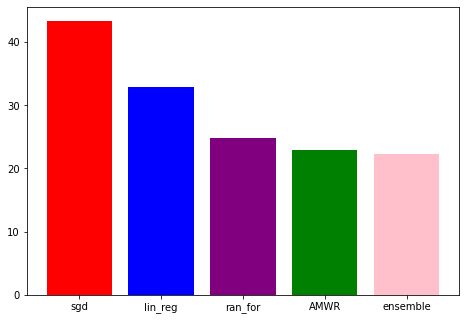

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algos = ['sgd', 'lin_reg', 'ran_for', 'AMWR','ensemble']
mape_errors = TotalError[0]
ax.bar(algos,mape_errors,color=['red', 'blue', 'purple', 'green', 'pink','black'])
plt.show()